In [2]:
import requests
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
import torch 
from sentence_transformers import SentenceTransformer
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [3]:
# Cargo datos
file_path = "productos_todas_categorias.csv"
df = pd.read_csv(file_path)

In [4]:
# Selecciono columnas necesarias
df = df[['id', 'title', 'condition', 'price', 'original_price', 'category_id', 'Category', 'thumbnail', 'permalink', 'available_quantity']]

In [5]:
df.isnull().sum()

id                    0
title                 0
condition             0
price                 0
original_price        0
category_id           0
Category              0
thumbnail             0
permalink             0
available_quantity    0
dtype: int64

In [6]:
# Limpieza de datos

# LLeno los valores de original_price cuando sea nulo, con los mismos valores de price
df['original_price'] = df['original_price'].fillna(df['price'])

#Borro valores nulos 
df = df.dropna(subset=['price', 'original_price', 'condition', 'thumbnail', 'permalink'])

#Colocamos la variable title solo en minusculas
df['title'] = df['title'].str.lower()

# Filtro el df para que solo queden los valores 'new' y 'used'
df = df[df['condition'].isin(['new', 'used'])]

In [7]:
# Genero de discount_percentage
df['discount_percentage'] = (df['original_price'] - df['price']) / df['original_price']

In [8]:
df.to_csv("productos_todas_categorias.csv")

In [ ]:
# Promedio de productos por categoría
promedio_productos_categoria = df['category_id'].value_counts().mean()

In [10]:
promedio_productos_categoria

15.067410035478966

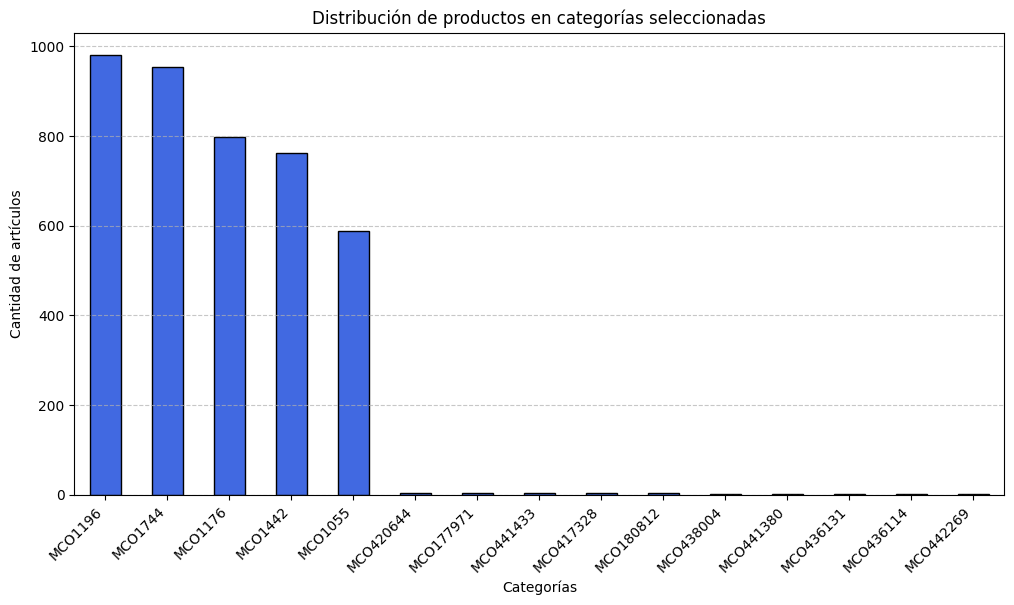

In [13]:
import matplotlib.pyplot as plt
import pandas as pd

# Obtener las 5 categorías con más productos
categorias_mas = df['category_id'].value_counts().head(5)

# Obtener las 5 categorías del medio
categorias_ordenadas = df['category_id'].value_counts().sort_values()
num_categorias = len(categorias_ordenadas)
indice_medio = num_categorias // 2
categorias_medio = categorias_ordenadas.iloc[indice_medio - 2:indice_medio + 3]

# Obtener las 5 categorías con menos productos
categorias_menos = df['category_id'].value_counts().tail(5)

# Concatenar las categorías seleccionadas
top_categorias = pd.concat([categorias_mas, categorias_medio, categorias_menos])

# Gráfico de barras
plt.figure(figsize=(12, 6))
top_categorias.plot(kind='bar', color='royalblue', edgecolor='black')
plt.xlabel("Categorías")
plt.ylabel("Cantidad de artículos")
plt.title("Distribución de productos en categorías seleccionadas")
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

📊 Proporción de productos nuevos y usados:
condition
new     93.440527
used     6.559473
Name: proportion, dtype: float64


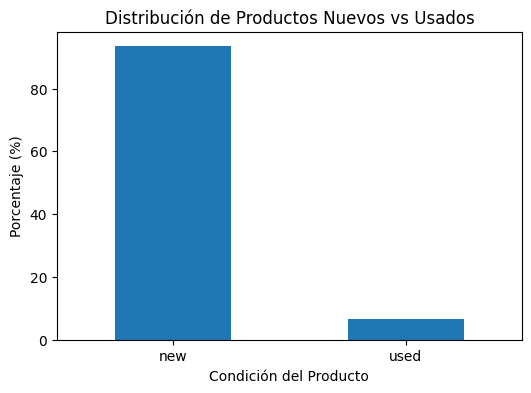

In [14]:
# Proporción de productos nuevos y usados
condition_counts = df['condition'].value_counts(normalize=True) * 100  # Convertir a porcentaje

print("📊 Proporción de productos nuevos y usados:")
print(condition_counts)

# Visualización con gráfico de barras
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
condition_counts.plot(kind='bar')
plt.xlabel("Condición del Producto")
plt.ylabel("Porcentaje (%)")
plt.title("Distribución de Productos Nuevos vs Usados")
plt.xticks(rotation=0)
plt.show()
